###Name : Vedant Mehta
###Class : BE COMPS
###UID : 2018130028
###Batch : B
### Experiment : 1

In [ ]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

#Importing the data
df_credit = pd.read_csv("/content/drive/MyDrive/DS/german_credit_data.csv",index_col=0)

In [ ]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [ ]:
print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [ ]:
print(df_credit.head())

   Age     Sex  Job Housing  ... Credit amount Duration              Purpose  Risk
0   67    male    2     own  ...          1169        6             radio/TV  good
1   22  female    2     own  ...          5951       48             radio/TV   bad
2   49    male    1     own  ...          2096       12            education  good
3   45    male    2    free  ...          7882       42  furniture/equipment  good
4   53    male    2    free  ...          4870       24                  car   bad

[5 rows x 10 columns]


In [ ]:
df_credit.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df_credit.dropna(subset = ["Saving accounts"], inplace=True)
df_credit.dropna(subset = ["Checking account"], inplace=True)

In [ ]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               522 non-null    int64 
 1   Sex               522 non-null    object
 2   Job               522 non-null    int64 
 3   Housing           522 non-null    object
 4   Saving accounts   522 non-null    object
 5   Checking account  522 non-null    object
 6   Credit amount     522 non-null    int64 
 7   Duration          522 non-null    int64 
 8   Purpose           522 non-null    object
 9   Risk              522 non-null    object
dtypes: int64(4), object(6)
memory usage: 44.9+ KB
None


<BarContainer object of 2 artists>

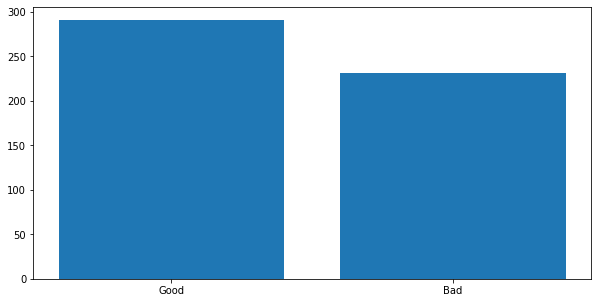

In [ ]:
x=['Good','Bad']
count_g=0
count_b = 0
for i in range(len(df_credit['Risk'])):
  # print(i)
  # print(type(df_credit['Risk']))
  if(df_credit['Risk'].iloc[i].lower() == 'good'):
    count_g +=1
  else:
    count_b+=1 
y=[count_g,count_b]
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y)

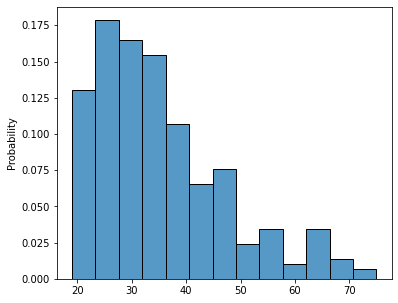

In [ ]:
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()

fig, ax = plt.subplots(figsize=(6, 5))

p = sns.histplot(data=df_good, stat='probability', ax=ax)

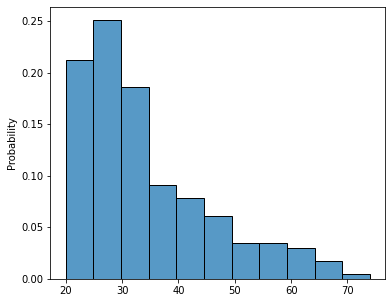

In [ ]:
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()

fig, ax = plt.subplots(figsize=(6, 5))

p = sns.histplot(data=df_bad, stat='probability', ax=ax)

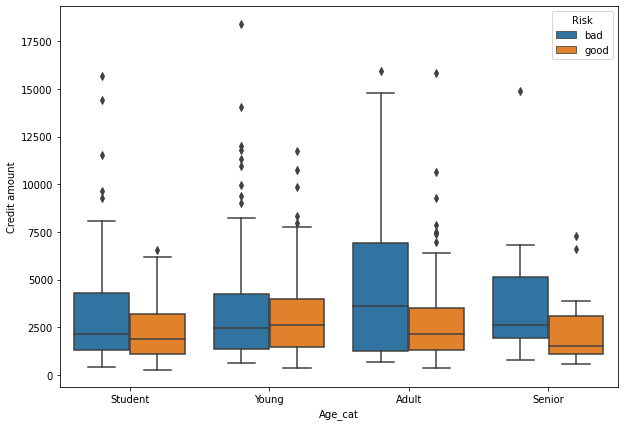

In [ ]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)
fig = plt.figure(figsize =(10, 7))
df_good_credit = df_credit.loc[df_credit["Age_cat"] == 'Student']['Credit amount'].values.tolist()
# Creating plot
sns.boxplot(x = df_credit['Age_cat'],
            y = df_credit["Credit amount"],
            hue = df_credit['Risk'],
            )

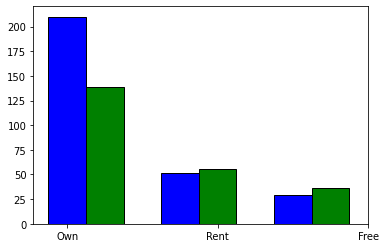

In [ ]:
df_good_own = df_credit.loc[df_credit['Risk']=='good'].loc[df_credit['Housing'] == 'own']['Housing'].value_counts().values
df_bad_own = df_credit.loc[df_credit['Risk']=='bad'].loc[df_credit['Housing'] == 'own']['Housing'].value_counts().values
df_good_rent = df_credit.loc[df_credit['Risk']=='good'].loc[df_credit['Housing'] == 'rent']['Housing'].value_counts().values
df_bad_rent = df_credit.loc[df_credit['Risk']=='bad'].loc[df_credit['Housing'] == 'rent']['Housing'].value_counts().values
df_good_free = df_credit.loc[df_credit['Risk']=='good'].loc[df_credit['Housing'] == 'free']['Housing'].value_counts().values
df_bad_free = df_credit.loc[df_credit['Risk']=='bad'].loc[df_credit['Housing'] == 'free']['Housing'].value_counts().values

r=np.arange(1)
plt.bar(r, df_good_own, color = 'b',
        width = 0.25, edgecolor = 'black',
        label='Good')
plt.bar(r + 0.25, df_bad_own, color = 'g',
        width = 0.25, edgecolor = 'black',
        label='Bad')
plt.bar(r+0.75, df_good_rent, color = 'b',
        width = 0.25, edgecolor = 'black',
        label='Good')
plt.bar(r + 1, df_bad_rent, color = 'g',
        width = 0.25, edgecolor = 'black',
        label='Bad')

plt.bar(r+1.5, df_good_free, color = 'b',
        width = 0.25, edgecolor = 'black',
        label='Good')
plt.bar(r + 1.75, df_bad_free, color = 'g',
        width = 0.25, edgecolor = 'black',
        label='Bad')
plt.xticks(np.arange(3),['Own','Rent','Free'])
plt.show()

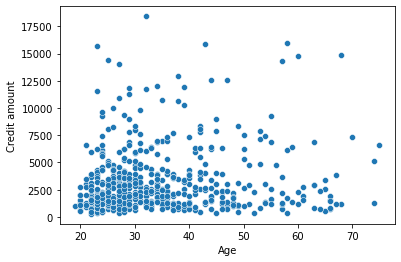

In [ ]:
sns.scatterplot(x='Age', y='Credit amount', data=df_credit)

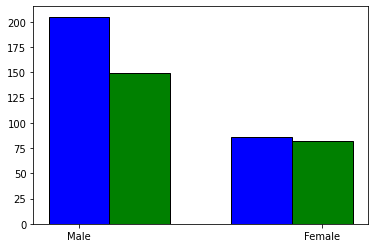

In [ ]:
df_good_male = df_credit.loc[df_credit['Risk']=='good'].loc[df_credit['Sex'] == 'male']['Sex'].value_counts().values
df_bad_male = df_credit.loc[df_credit['Risk']=='bad'].loc[df_credit['Sex'] == 'male']['Sex'].value_counts().values
df_good_female = df_credit.loc[df_credit['Risk']=='good'].loc[df_credit['Sex'] == 'female']['Sex'].value_counts().values
df_bad_female = df_credit.loc[df_credit['Risk']=='bad'].loc[df_credit['Sex'] == 'female']['Sex'].value_counts().values
r=np.arange(1)
plt.bar(r, df_good_male, color = 'b',
        width = 0.25, edgecolor = 'black',
        label='Good')
plt.bar(r + 0.25, df_bad_male, color = 'g',
        width = 0.25, edgecolor = 'black',
        label='Bad')
plt.bar(r+0.75, df_good_female, color = 'b',
        width = 0.25, edgecolor = 'black',
        label='Good')
plt.bar(r + 1, df_bad_female, color = 'g',
        width = 0.25, edgecolor = 'black',
        label='Bad')
plt.xticks(np.arange(2),['Male','Female'])
plt.show()

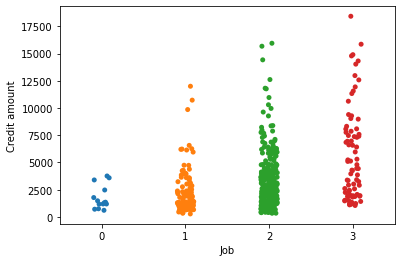

In [ ]:
sns.stripplot(x='Job', y='Credit amount', data=df_credit)

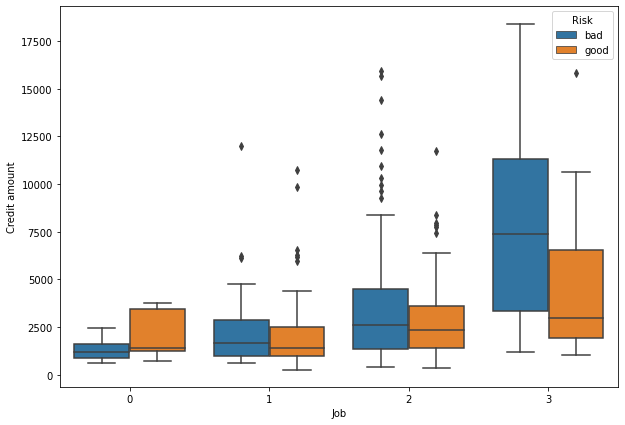

In [ ]:
fig = plt.figure(figsize =(10, 7))
sns.boxplot(x = df_credit['Job'],
            y = df_credit["Credit amount"],
            hue = df_credit['Risk'],
            )

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



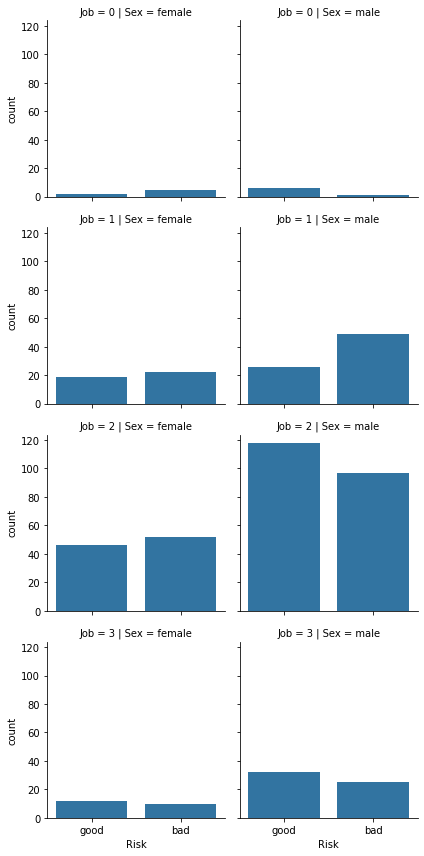

In [ ]:
g = sns.FacetGrid(df_credit, col="Sex",  row="Job")
g = g.map(sns.countplot, "Risk")

little        412
moderate       64
quite rich     23
rich           23
Name: Saving accounts, dtype: int64


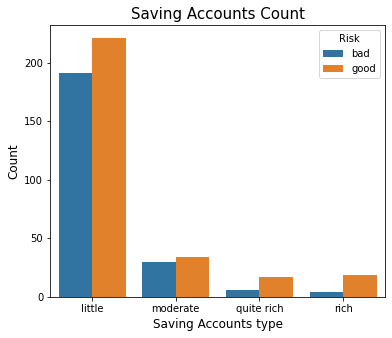

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
print(df_credit['Saving accounts'].value_counts())
g = sns.countplot(x="Saving accounts", data=df_credit, ax=ax,hue="Risk")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.show()

little      245
moderate    224
rich         53
Name: Checking account, dtype: int64


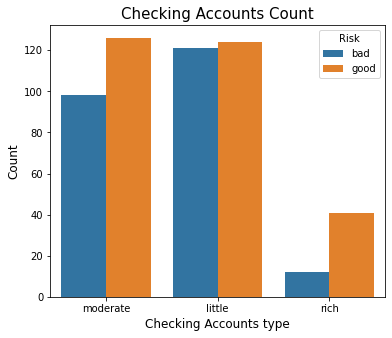

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
print(df_credit['Checking account'].value_counts())
g = sns.countplot(x="Checking account", data=df_credit, ax=ax,hue="Risk")
g.set_title("Checking Accounts Count", fontsize=15)
g.set_xlabel("Checking Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.show()

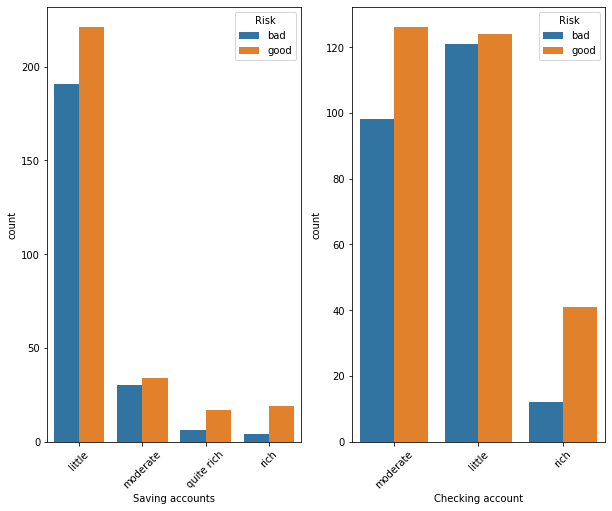

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
sns.countplot(x="Saving accounts", hue="Risk", data=df_credit, ax=ax1)
sns.countplot(x="Checking account", hue="Risk", data=df_credit, ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


fig.show()

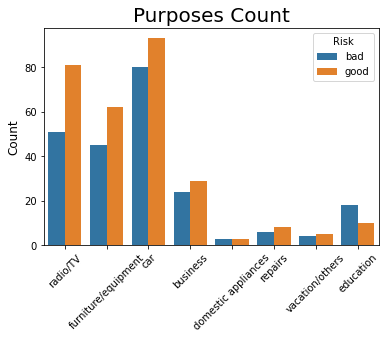

In [ ]:
g = sns.countplot(x="Purpose", data=df_credit, hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)
plt.show()

In [ ]:
# getting dummies for all the categorical variables
dummies_columns = ['Job', 'Purpose', 'Sex', 'Housing', 'Saving accounts', 'Checking account']
for col in dummies_columns:
    df_credit = df_credit.merge(pd.get_dummies(df_credit[col], drop_first=True, prefix=str(col)), left_index=True, right_index=True) 

# encoding risk as binary
r = {"good":0, "bad": 1}
df_credit['Risk'] = df_credit['Risk'].map(r)

# drop redundant variables
columns_to_drop = ['Job', 'Purpose','Sex','Housing','Saving accounts','Checking account']
df_credit.drop(columns_to_drop, axis=1, inplace=True)

df_credit.head()

,Age,Credit amount,Duration,Risk,Age_cat,Job_1,Job_2,Job_3,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich
1,22,5951,48,1,Student,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,45,7882,42,0,Adult,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,53,4870,24,1,Adult,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,35,6948,36,0,Young,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
9,28,5234,30,1,Young,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0


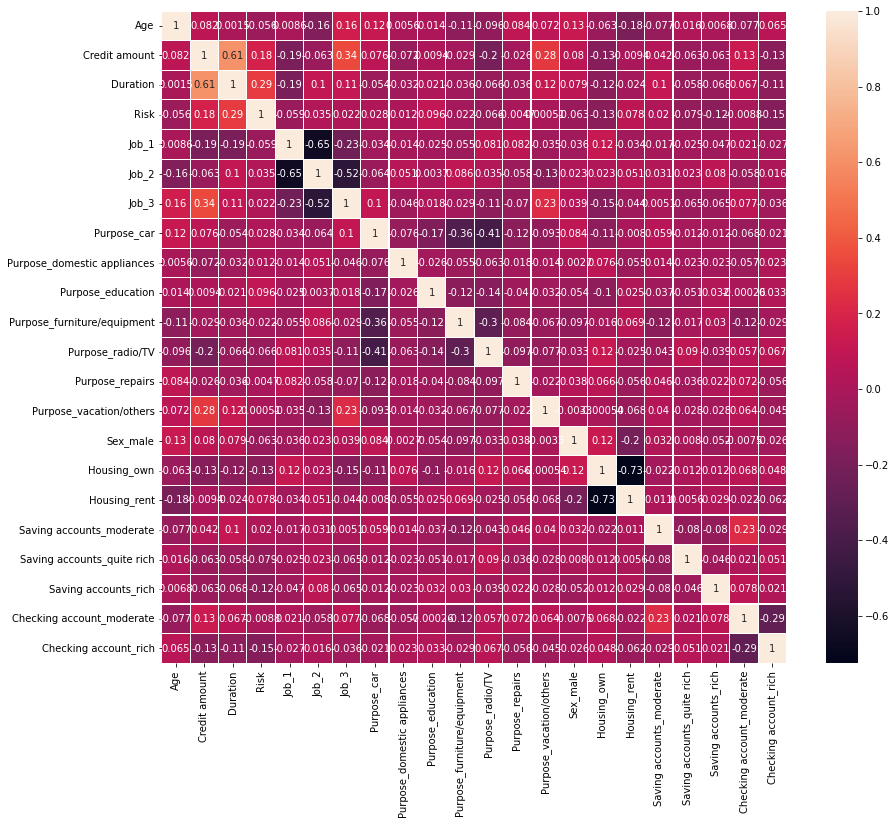

In [ ]:
plt.figure(figsize=(14,12))
dataplot = sns.heatmap(df_credit.corr(),annot=True,linewidths=0.1,vmax=1.0)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df_credit.drop(['Risk', 'Credit amount','Age_cat'], axis=1).values
y = df_credit['Risk'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
print(accuracy_score(y_pred_log, y_test))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

0.5619047619047619
[[34 21]
 [25 25]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60        55
           1       0.54      0.50      0.52        50

    accuracy                           0.56       105
   macro avg       0.56      0.56      0.56       105
weighted avg       0.56      0.56      0.56       105



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Conclusion:


1.   I learned how one can deal with raw data and how to preprocess the data and structure it.
2.   Able to visualize the data in proper EDA format and was able to apply logistic regression to the structure data




